$$f(x) = \sum_n^N a_n sin(2\pi f_n t + \phi_n)$$

exemple 

$$f(x) = a_1\sin(2\pi f_1 t + \phi_1) + a_2\sin(2\pi f_2 t + \phi_2)$$

Théorème de Shannon

In [1]:
import numpy as np 
from matplotlib import pyplot as plt 


In [ ]:

Fs = 512 # 160 Hz 

f0 = 256+100 # Hz 

temps_max = 1 / 10
t = np.arange(0,Fs*temps_max) # pour une seconde 

a0 = 1 

phase0 = 2*np.pi/360*20

f = a0 * np.sin(2*np.pi*f0*t/Fs + phase0)

Fs_inf = 8192
t_analogique = np.arange(0,Fs_inf*temps_max)
f_analogique = a0 * np.sin(2*np.pi*f0*t_analogique/Fs_inf + phase0)

plt.figure(figsize=(16,8))
plt.plot(t_analogique/Fs_inf,f_analogique,'-b',lw=4)

plt.plot(t/Fs,f,'-r',lw=3)
plt.plot(t/Fs,f,'ok')
plt.grid()






In [2]:
def sinusoids(a,f,Fs,T,phase):


    t = np.arange(0,Fs*T) # pour une seconde
    s = 0 
    for i,freq in enumerate(f):

        s += a[i] * np.sin(2*np.pi*freq*t/Fs + 2*np.pi/360*phase[i])
    return s


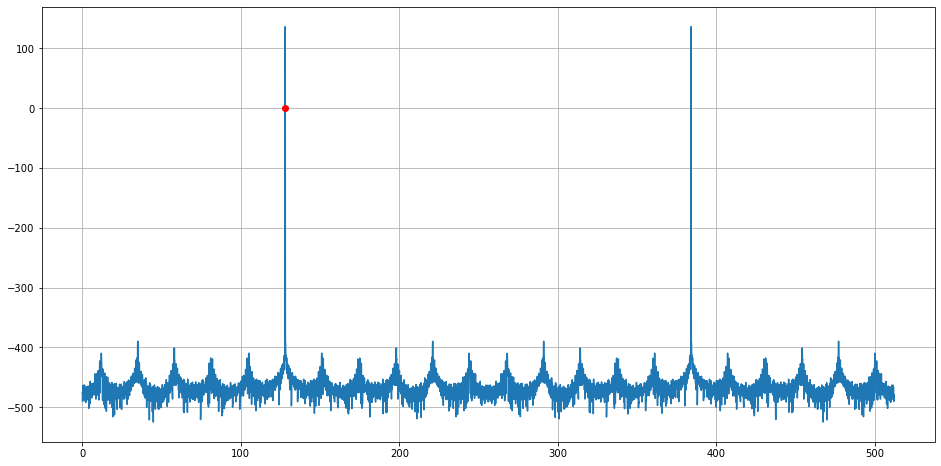

In [14]:


N = 1
a = np.random.rand(N)
f = np.random.rand(N)*256
phase = np.random.randn(N)*360
Fs = 512 
T = 10

a[0] = 1 
f[0] = 128

x = sinusoids(a,f,Fs,T,phase)

# plt.plot(np.arange(0,Fs*T)/Fs,x )

from numpy.fft import fft 

spectre = np.abs(fft(x))**2 

frequence = np.arange(Fs*T)/T 

plt.figure(figsize=(16,8))
plt.plot(frequence, 20*np.log10(spectre))
plt.plot(f,np.ones(N),'or')
plt.grid()

$$\sin = \frac{\exp{ix} - \exp{-ix}}{2}$$


In [95]:
from IPython.display import Audio

x = x/np.abs(x).max() 
Audio(data=x, rate=Fs)

In [5]:
import sounddevice as sd
import numpy as np 

def sinusoids(a,f,Fs,T,phase):


    t = np.arange(0,Fs*T) # pour une seconde
    s = 0 
    for i,freq in enumerate(f):

        s += a[i] * np.sin(2*np.pi*freq*t/Fs + 2*np.pi/360*phase[i])
    return s



In [17]:

def sinusoidsH(N,f,Fs,T,phase):



    t = np.arange(0,Fs*T) # pour une seconde
    s = 0 
    for i in range(N):

        s += np.sqrt((1/(i+1))) * np.sin(2*np.pi*i*f*t/Fs + 2*np.pi/360*phase[i])
    return s

N = 20
a = np.random.rand(N)
f = np.random.rand(N)*256
phase = np.random.randn(N)*360
Fs = 44100 
T = 2
f = 80

x = sinusoidsH(5,f,Fs,T,phase)

x = x/np.abs(x).max() 
sd.play(x,Fs)

f + 1 demi ton = $$f_2 = f*(1+2^{1/12})$$